In [1]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.ndimage.interpolation import rotate

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
cd "~\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted"

/Users/jdhare/Google Drive/MAGPIE/data/2015/s1214_15 C Reconnection 12 Frame/s1214_15/s1214_15 shifted


In [3]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
b=[]
s=[]
for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)

    bk_fn=shot+" Background_0"+st+".png"
    bk_im=plt.imread(bk_fn) #read background image
    #bk_im=np.asarray(np.sum(bk_im,2), dtype=float)
    b.append(bk_im)#np.asarray(np.sum(bk_im,2), dtype=float)) #convert to grrayscale
    sh_fn=shot+" Shot_0"+st+".png" 
    sh_im=plt.imread(sh_fn)
    s.append(sh_im)

In [4]:
#normalise between images, assuming same brightness in background image
norms=[b_im[100:-100,100:-100].sum() for b_im in b]
n_max=max(norms)
nn=[n/n_max for n in norms]
s_n=[s_im[100:-100,100:-100]/n for s_im, n in zip(s, nn)] 

In [13]:
t=np.log(s_n[10])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [20]:
s[10].mean()

0.10754263

<IPython.core.display.Javascript object>


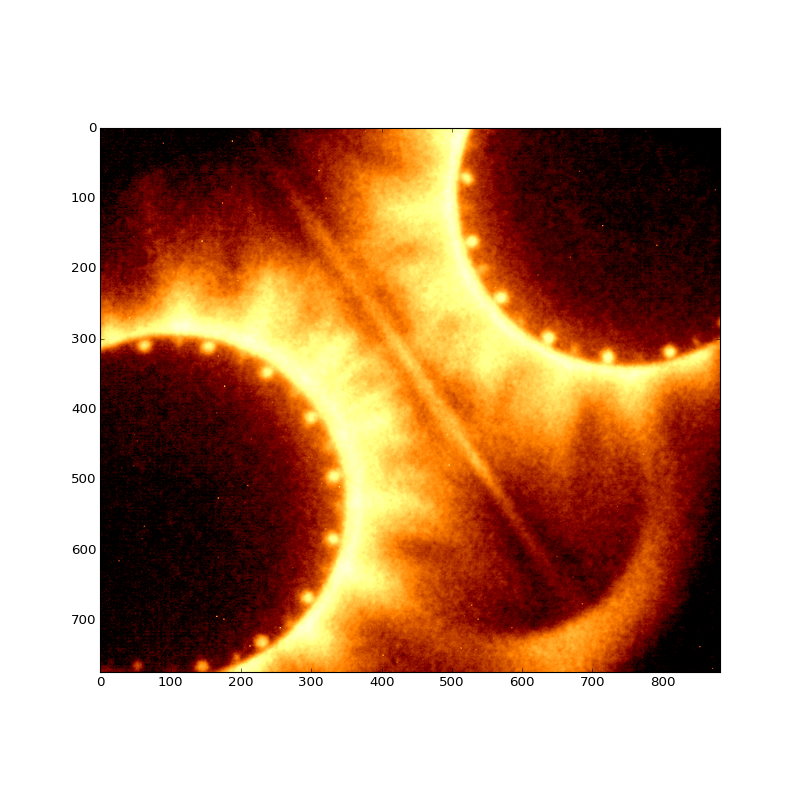

In [25]:
fig, ax=plt.subplots(figsize=(10,10))
ax.imshow(np.log(s_n[9]), cmap='afmhot', clim=[-4,0.2])

In [11]:
#142, 308
#531, 572
#rotate
dx=308-572
dy=142-531
theta=180/np.pi*np.arctan(dx/dy)

In [87]:
theta

34.163296241636097

In [17]:
s_r=[rotate(s_im, -theta)for s_im in s_n]

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


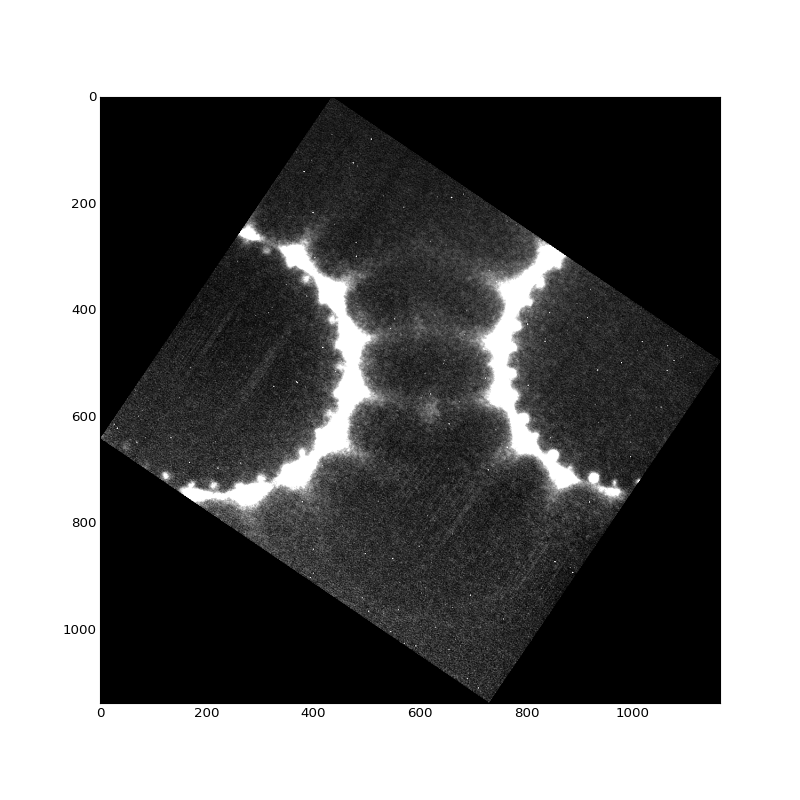

In [82]:
fig, ax=plt.subplots(figsize=(10,10))
ax.imshow(s_r[1], cmap='gray', clim=[0,0.1])

In [83]:
x0=610
y0=512
sl=[s_im[y0-400:y0+400, x0-10:x0+10].mean(axis=1) for s_im in s_r]
scale=27#px/mm
mm=sl[0].size/(2*scale)
x_mm=np.linspace(-mm, mm, sl[0].size)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


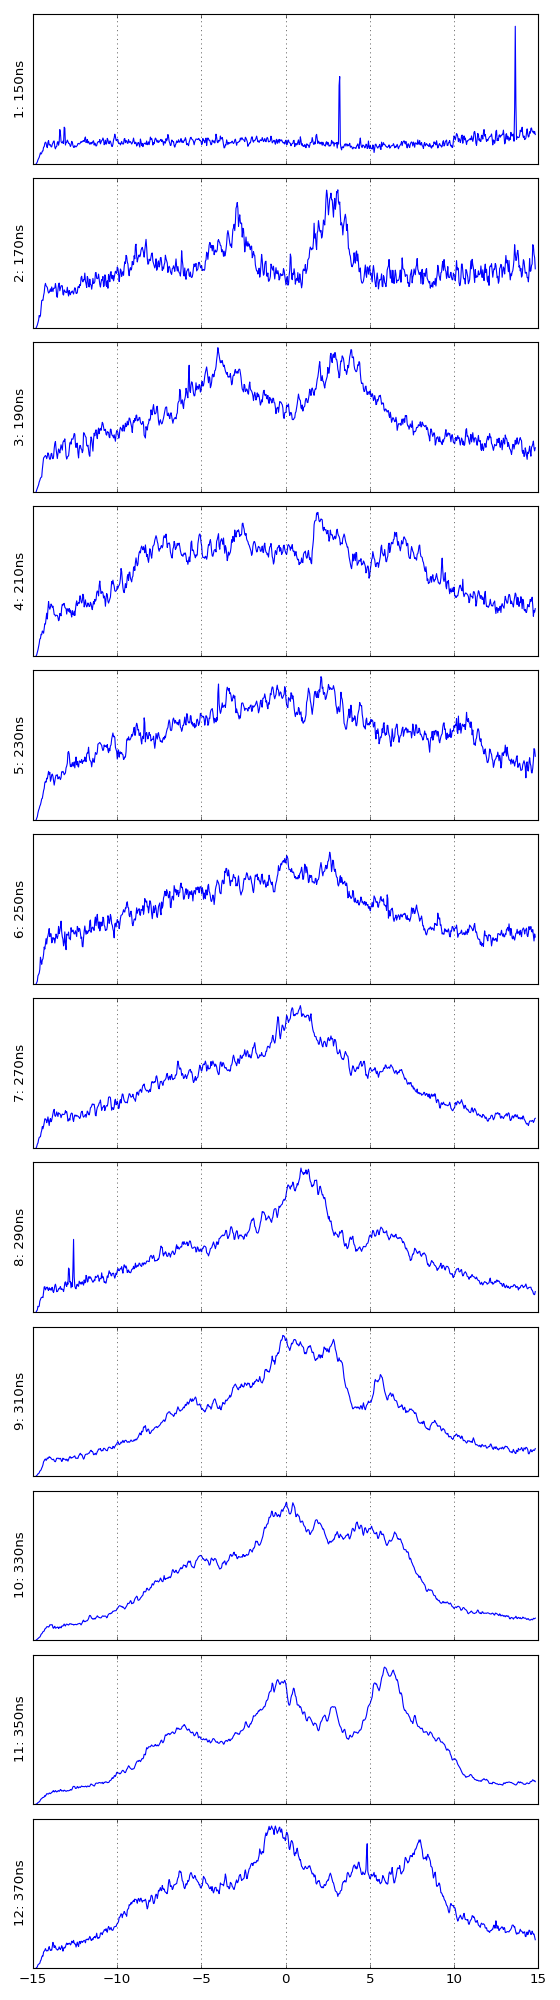

In [86]:
fig, ax=plt.subplots(12, 1, sharex=True,figsize=(7,25))
fig.subplots_adjust(hspace=0, wspace=0)
for ain,a in enumerate(ax):
    a.plot(x_mm,sl[ain])
    #a.set_ylim(0,0.4)
    a.axes.get_yaxis().set_ticks([])
    a.set_ylabel(str(ain+1)+': '+str(ain*20+150)+ 'ns')
    a.grid(True)
fig.tight_layout()